In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
unv_df=pd.read_csv(r"C:\Users\36450057\Downloads/Uni.csv")

In [3]:
#displaying the top 5 data
unv_df.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
#Calculate the no of rows and columns
unv_df.shape

(2200, 14)

In [6]:
unv_df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

Institution and country are the only categorical data. The rest are numeric data of integer and float type.

In [7]:
#Dataframe information
unv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [8]:
#Check for the missing values 
unv_df.isna().any()

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool

In [9]:
#Calculating the no of missing values for broad_impact column
unv_df['broad_impact'].isna().sum()

200

There are 200 missing values in the broad_impact column.Broad_impact values are not available for year 2014 and 2015. Also the mean and median are equal which means the data is normally distributed.

In [10]:
unv_df.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [11]:
unv_df["year"].value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

All the rankings are based from the year 2012-2015. We will divide our data into four parts for each year respectively.

In [12]:
# Reading columns
df1 = unv_df[['country' ,'institution','national_rank' , 'year']]
df1.head(10)

,country,institution,national_rank,year
0,USA,Harvard University,1,2012
1,USA,Massachusetts Institute of Technology,2,2012
2,USA,Stanford University,3,2012
3,United Kingdom,University of Cambridge,1,2012
4,USA,California Institute of Technology,4,2012
5,USA,Princeton University,5,2012
6,United Kingdom,University of Oxford,2,2012
7,USA,Yale University,6,2012
8,USA,Columbia University,7,2012
9,USA,"University of California, Berkeley",8,2012


In [14]:
#Read specific rows
df1.iloc[3:6]

,country,institution,national_rank,year
3,United Kingdom,University of Cambridge,1,2012
4,USA,California Institute of Technology,4,2012
5,USA,Princeton University,5,2012


In [18]:
#Filter data
df1.loc[df1['country']== 'South Africa']

,country,institution,national_rank,year
313,South Africa,University of the Witwatersrand,1,2014
466,South Africa,University of Cape Town,2,2014
510,South Africa,Stellenbosch University,3,2014
658,South Africa,University of KwaZulu-Natal,4,2014
808,South Africa,University of Pretoria,5,2014
1348,South Africa,University of the Witwatersrand,1,2015
1447,South Africa,University of Cape Town,2,2015
1505,South Africa,Stellenbosch University,3,2015
1677,South Africa,University of KwaZulu-Natal,4,2015
1877,South Africa,University of Pretoria,5,2015


In [16]:
#Sort Data Frame
display('Sorted Data Frame', df1.sort_values(['country'], ascending=True).head(5))

'Sorted Data Frame'

,country,institution,national_rank,year
1943,Argentina,National University of La Plata,2,2015
1096,Argentina,National University of Córdoba,3,2014
2132,Argentina,National University of Córdoba,3,2015
940,Argentina,National University of La Plata,2,2014
1177,Argentina,National University of Rosario,4,2014


In [ ]:
#Sort Data Frame in descending order
display('Sorted Data Frame', df1.sort_values(['country'], ascending=False).head(5))

In [19]:
#Unique Values [Drop duplicates]
unv_df['country'].drop_duplicates(keep='first').head(10)

0                USA
3     United Kingdom
13             Japan
15       Switzerland
17            Israel
34            Canada
47            France
69            Sweden
74       South Korea
76             Italy
Name: country, dtype: object

In [20]:
# List all Countries with Ranked universities 
countries = unv_df['country'].unique()
type(countries) , countries

(numpy.ndarray,
 array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
        'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
        'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
        'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
        'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
        'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
        'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
        'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
        'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
        'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
        'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
        'Puerto Rico'], dtype=object))

In [21]:
#Check for the missing values 

unv_df.isna().any()

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool

broad_impact is the only column with NuNs

In [22]:
#the no of missing values for broad_impact column
unv_df['broad_impact'].isna().sum()

200

In [23]:
# Mean of all Columns
unv_df.mean()

world_rank               459.590909
national_rank             40.278182
quality_of_education     275.100455
alumni_employment        357.116818
quality_of_faculty       178.888182
publications             459.908636
influence                459.797727
citations                413.417273
broad_impact             496.699500
patents                  433.346364
score                     47.798395
year                    2014.318182
dtype: float64

In [24]:
# Max value per column
unv_df.max()

world_rank                           1000
institution             Örebro University
country                           Uruguay
national_rank                         229
quality_of_education                  367
alumni_employment                     567
quality_of_faculty                    218
publications                         1000
influence                             991
citations                             812
broad_impact                       1000.0
patents                               871
score                               100.0
year                                 2015
dtype: object

In [25]:
# Min value per column
unv_df.min()

world_rank                                                     1
institution             AGH University of Science and Technology
country                                                Argentina
national_rank                                                  1
quality_of_education                                           1
alumni_employment                                              1
quality_of_faculty                                             1
publications                                                   1
influence                                                      1
citations                                                      1
broad_impact                                                 1.0
patents                                                        1
score                                                      43.36
year                                                        2012
dtype: object

In [26]:
# Median
unv_df.median()

world_rank               450.5
national_rank             21.0
quality_of_education     355.0
alumni_employment        450.5
quality_of_faculty       210.0
publications             450.5
influence                450.5
citations                406.0
broad_impact             496.0
patents                  426.0
score                     45.1
year                    2014.0
dtype: float64

In [27]:
unv_df.std() #Standard Deviation

world_rank              304.320363
national_rank            51.740870
quality_of_education    121.935100
alumni_employment       186.779252
quality_of_faculty       64.050885
publications            303.760352
influence               303.331822
citations               264.366549
broad_impact            286.919755
patents                 273.996525
score                     7.760806
year                      0.762130
dtype: float64

In [28]:
unv_df.var() #Variance

world_rank              92610.883046
national_rank            2677.117668
quality_of_education    14868.168622
alumni_employment       34886.488848
quality_of_faculty       4102.515913
publications            92270.351358
influence               92010.194174
citations               69889.672098
broad_impact            82322.945673
patents                 75074.095530
score                      60.230116
year                        0.580843
dtype: float64

In [29]:
#Lower Quartile / First Quartile
unv_df.quantile(0.25)

world_rank               175.75
national_rank              6.00
quality_of_education     175.75
alumni_employment        175.75
quality_of_faculty       175.75
publications             175.75
influence                175.75
citations                161.00
broad_impact             250.50
patents                  170.75
score                     44.46
year                    2014.00
Name: 0.25, dtype: float64

In [30]:
#Second Quartile / Median
unv_df.quantile(0.50)

world_rank               450.5
national_rank             21.0
quality_of_education     355.0
alumni_employment        450.5
quality_of_faculty       210.0
publications             450.5
influence                450.5
citations                406.0
broad_impact             496.0
patents                  426.0
score                     45.1
year                    2014.0
Name: 0.5, dtype: float64

In [31]:
# Upper Quartile
unv_df.quantile(0.75)

world_rank               725.250
national_rank             49.000
quality_of_education     367.000
alumni_employment        478.000
quality_of_faculty       218.000
publications             725.000
influence                725.250
citations                645.000
broad_impact             741.000
patents                  714.250
score                     47.545
year                    2015.000
Name: 0.75, dtype: float64

In [32]:
#IQR (Interquartile Range)
unv_df.quantile(0.75) - unv_df.quantile(0.25)

world_rank              549.500
national_rank            43.000
quality_of_education    191.250
alumni_employment       302.250
quality_of_faculty       42.250
publications            549.250
influence               549.500
citations               484.000
broad_impact            490.500
patents                 543.500
score                     3.085
year                      1.000
dtype: float64

In [34]:
# GENERATES DESCRIPTIVE STATS
unv_df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [35]:
#Return unbiased skew
#unv_df.kurt()
unv_df.skew()

world_rank              0.108113
national_rank           1.974774
quality_of_education   -1.000067
alumni_employment      -0.508695
quality_of_faculty     -1.540628
publications            0.110559
influence               0.107385
citations               0.063364
broad_impact            0.007746
patents                -0.001490
score                   4.184903
year                   -1.223656
dtype: float64

In [36]:
#Correlation
unv_df.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.942998,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.942998,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570


In [37]:
#Covariance
unv_df.cov()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,92610.883046,3756.208897,25090.710964,37999.668548,12940.021084,85325.970338,82697.881289,68913.128033,78124.813157,58218.971227,-1296.844868,74.413990
national_rank,3756.208897,2677.117668,1337.353580,1307.965670,738.478596,5137.155941,2528.196358,2555.112610,2653.468893,2260.347442,-80.212209,4.059697
quality_of_education,25090.710964,1337.353580,14868.168622,13811.196536,6140.110828,23136.694494,23880.176763,20323.080392,15994.173538,17644.381289,-568.300430,39.749287
alumni_employment,37999.668548,1307.965670,13811.196536,34886.488848,6682.961227,32458.514088,29879.417455,27612.293206,20890.475419,27032.610725,-739.815933,60.884596
quality_of_faculty,12940.021084,738.478596,6140.110828,6682.961227,4102.515913,12343.406787,12753.093334,11043.414574,8259.593611,9741.978720,-344.749347,23.664972
publications,85325.970338,5137.155941,23136.694494,32458.514088,12343.406787,92270.351358,80618.202976,66645.291893,76024.618017,55893.294051,-1230.838437,73.675286
influence,82697.881289,2528.196358,23880.176763,29879.417455,12753.093334,80618.202976,92010.194174,67777.798857,75775.229924,50848.789510,-1230.811052,73.583716
citations,68913.128033,2555.112610,20323.080392,27612.293206,11043.414574,66645.291893,67777.798857,69889.672098,61194.223232,43369.161000,-1071.885442,66.241432
broad_impact,78124.813157,2653.468893,15994.173538,20890.475419,8259.593611,76024.618017,75775.229924,61194.223232,82322.945673,41928.455188,-1005.202078,-0.017759
patents,58218.971227,2260.347442,17644.381289,27032.610725,9741.978720,55893.294051,50848.789510,43369.161000,41928.455188,75074.095530,-1009.651954,76.965232


In [38]:
# Hormonic Mean
import statistics as st
st.harmonic_mean(unv_df['alumni_employment'])

98.76620780194413

In [39]:
# low median of the data with EVEN length
st.median_low(unv_df['alumni_employment'])

450

In [40]:
# High median of the data with EVEN length
st.median_high(unv_df['alumni_employment'])

451

In [41]:
# Mode of Dataset
st.mode(unv_df['publications'])

101

In [42]:
# Sample Variance
st.variance(unv_df['alumni_employment'])

34886.48884844351

In [43]:
#Population Variance
st.pvariance(unv_df['alumni_employment'])

34870.6313535124

In [44]:
#Sample Standard Deviation
st.stdev(unv_df['alumni_employment'])

186.77925165404082

In [45]:
#Population Standard Deviation
st.pstdev(unv_df['alumni_employment'])

186.7367969991785

In [46]:
# Finding MAX value in Columns
unv_df.apply(max)

world_rank                           1000
institution             Örebro University
country                           Uruguay
national_rank                         229
quality_of_education                  367
alumni_employment                     567
quality_of_faculty                    218
publications                         1000
influence                             991
citations                             812
broad_impact                          NaN
patents                               871
score                               100.0
year                                 2015
dtype: object

In [47]:
# Finding minimum value in Columns
unv_df.apply(min)

world_rank                                                     1
institution             AGH University of Science and Technology
country                                                Argentina
national_rank                                                  1
quality_of_education                                           1
alumni_employment                                              1
quality_of_faculty                                             1
publications                                                   1
influence                                                      1
citations                                                      1
broad_impact                                                 NaN
patents                                                        1
score                                                      43.36
year                                                        2012
dtype: object

In [48]:
# Using Lambda function in Dataframes
unv_df.apply(lambda x: min(x))

world_rank                                                     1
institution             AGH University of Science and Technology
country                                                Argentina
national_rank                                                  1
quality_of_education                                           1
alumni_employment                                              1
quality_of_faculty                                             1
publications                                                   1
influence                                                      1
citations                                                      1
broad_impact                                                 NaN
patents                                                        1
score                                                      43.36
year                                                        2012
dtype: object

In [49]:
unv_df.groupby(['year']).mean().head(10)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,
2012,50.5,18.140,66.420,75.390,56.930,55.020,54.890,54.420,NaN,63.650,54.94090
2013,50.5,17.620,65.760,75.910,56.060,54.670,56.280,53.930,NaN,63.550,55.27120
2014,500.5,42.524,292.164,363.991,188.002,500.411,500.163,447.349,496.735,448.968,47.27141
2015,500.5,42.512,299.839,406.536,194.253,500.419,500.275,451.334,496.664,491.674,46.86385


In [50]:
unv_df.groupby(['year']).mean().sort_values("quality_of_faculty",ascending=False).head(10)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,
2015,500.5,42.512,299.839,406.536,194.253,500.419,500.275,451.334,496.664,491.674,46.86385
2014,500.5,42.524,292.164,363.991,188.002,500.411,500.163,447.349,496.735,448.968,47.27141
2012,50.5,18.140,66.420,75.390,56.930,55.020,54.890,54.420,NaN,63.650,54.94090
2013,50.5,17.620,65.760,75.910,56.060,54.670,56.280,53.930,NaN,63.550,55.27120


In [51]:
unv_df.groupby(['year']).mean().sort_values("quality_of_education",ascending=False).head(10)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,
2015,500.5,42.512,299.839,406.536,194.253,500.419,500.275,451.334,496.664,491.674,46.86385
2014,500.5,42.524,292.164,363.991,188.002,500.411,500.163,447.349,496.735,448.968,47.27141
2012,50.5,18.140,66.420,75.390,56.930,55.020,54.890,54.420,NaN,63.650,54.94090
2013,50.5,17.620,65.760,75.910,56.060,54.670,56.280,53.930,NaN,63.550,55.27120


In [52]:
unv_df.sum()

world_rank                                                        1011100
institution             Harvard UniversityMassachusetts Institute of T...
country                 USAUSAUSAUnited KingdomUSAUSAUnited KingdomUSA...
national_rank                                                       88612
quality_of_education                                               605221
alumni_employment                                                  785657
quality_of_faculty                                                 393554
publications                                                      1011799
influence                                                         1011555
citations                                                          909518
broad_impact                                                     993399.0
patents                                                            953362
score                                                           105156.47
year                                  

In [53]:
unv_df.groupby(['year']).sum().head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,
2012,5050,1814,6642,7539,5693,5502,5489,5442,0.0,6365,5494.09
2013,5050,1762,6576,7591,5606,5467,5628,5393,0.0,6355,5527.12
2014,500500,42524,292164,363991,188002,500411,500163,447349,496735.0,448968,47271.41
2015,500500,42512,299839,406536,194253,500419,500275,451334,496664.0,491674,46863.85


In [54]:
unv_df.groupby(['year']).sum().head().sort_values("quality_of_education",ascending=False).head(10)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,
2015,500500,42512,299839,406536,194253,500419,500275,451334,496664.0,491674,46863.85
2014,500500,42524,292164,363991,188002,500411,500163,447349,496735.0,448968,47271.41
2012,5050,1814,6642,7539,5693,5502,5489,5442,0.0,6365,5494.09
2013,5050,1762,6576,7591,5606,5467,5628,5393,0.0,6355,5527.12


In [55]:
unv_df.count()

world_rank              2200
institution             2200
country                 2200
national_rank           2200
quality_of_education    2200
alumni_employment       2200
quality_of_faculty      2200
publications            2200
influence               2200
citations               2200
broad_impact            2000
patents                 2200
score                   2200
year                    2200
dtype: int64

In [56]:
unv_df['count1'] = 0
unv_df.groupby(['year']).count()['count1']

year
2012     100
2013     100
2014    1000
2015    1000
Name: count1, dtype: int64

In [57]:
unv_df['count1'] = 0
unv_df.groupby(['year','country']).count()['count1']

year  country             
2012  Australia                 2
      Canada                    3
      Denmark                   1
      Finland                   1
      France                    5
                             ... 
2015  USA                     229
      Uganda                    1
      United Arab Emirates      1
      United Kingdom           65
      Uruguay                   1
Name: count1, Length: 152, dtype: int64

In [58]:
# Pivot table with SUM aggregation
pd.pivot_table(unv_df , index= ['year' , 'quality_of_faculty'] , aggfunc='sum')

alumni_employment  broad_impact  citations  count1  \
year quality_of_faculty                                                       
2012 1                                   9           0.0          1       0   
     2                                  14           0.0         26       0   
     3                                  17           0.0          4       0   
     4                                  24           0.0         11       0   
     5                                  11           0.0          2       0   
...                                    ...           ...        ...     ...   
2015 213                               526         159.0         93       0   
     214                               448         608.0        632       0   
     216                                 7         295.0        234       0   
     217                               567         300.0        428       0   
     218                            346591      455179.0     411124       0   

                         influence  national_rank  patents  publications  \
year quality_of_faculty                                                    
2012 1                           1              1        5             1   
     2                          33              5      101            53   
     3                           4              2        1            12   
     4                          16              1       50            16   
     5                           2              3       15             4   
...                            ...            ...      ...           ...   
2015 213                       128              7      433           163   
     214                       690             12      936           545   
     216                       314              1      172           327   
     217                       249             31      271           329   
     218                    460543          37219   429802        456354   

                         quality_of_education     score  world_rank  
year quality_of_faculty                                              
2012 1                                      7    100.00           1  
     2                                      8     82.50           6  
     3                                      9     91.67           2  
     4                                     10     86.17           4  
     5                                     17     89.50           3  
...                                       ...       ...         ...  
2015 213                                  184     47.49         200  
     214                                  381     92.60         555  
     216                                   98     59.20          36  
     217                                  304     45.51         346  
     218                               263110  35342.09      460383  

[509 rows x 11 columns]

In [59]:
# Pivot table with MEAN aggregation
pd.pivot_table(unv_df , index= ['year' , 'quality_of_faculty'] , aggfunc='mean')

alumni_employment  broad_impact  citations  count1  \
year quality_of_faculty                                                       
2012 1                            9.000000           NaN    1.00000       0   
     2                           14.000000           NaN   26.00000       0   
     3                           17.000000           NaN    4.00000       0   
     4                           24.000000           NaN   11.00000       0   
     5                           11.000000           NaN    2.00000       0   
...                                    ...           ...        ...     ...   
2015 213                        526.000000    159.000000   93.00000       0   
     214                        224.000000    304.000000  316.00000       0   
     216                          7.000000    295.000000  234.00000       0   
     217                        567.000000    300.000000  428.00000       0   
     218                        442.644955    581.326948  525.06258       0   

                          influence  national_rank     patents  publications  \
year quality_of_faculty                                                        
2012 1                     1.000000       1.000000    5.000000      1.000000   
     2                    33.000000       5.000000  101.000000     53.000000   
     3                     4.000000       2.000000    1.000000     12.000000   
     4                    16.000000       1.000000   50.000000     16.000000   
     5                     2.000000       3.000000   15.000000      4.000000   
...                             ...            ...         ...           ...   
2015 213                 128.000000       7.000000  433.000000    163.000000   
     214                 345.000000       6.000000  468.000000    272.500000   
     216                 314.000000       1.000000  172.000000    327.000000   
     217                 249.000000      31.000000  271.000000    329.000000   
     218                 588.177522      47.533844  548.916986    582.827586   

                         quality_of_education       score  world_rank  
year quality_of_faculty                                                
2012 1                               7.000000  100.000000     1.00000  
     2                               8.000000   82.500000     6.00000  
     3                               9.000000   91.670000     2.00000  
     4                              10.000000   86.170000     4.00000  
     5                              17.000000   89.500000     3.00000  
...                                       ...         ...         ...  
2015 213                           184.000000   47.490000   200.00000  
     214                           190.500000   46.300000   277.50000  
     216                            98.000000   59.200000    36.00000  
     217                           304.000000   45.510000   346.00000  
     218                           336.028097   45.136769   587.97318  

[509 rows x 11 columns]

In [60]:
#Get the new dataframe
new_unv_df=unv_df.set_index(['year', 'quality_of_faculty'])
new_unv_df

world_rank                            institution  \
year quality_of_faculty                                                      
2012 1                            1                     Harvard University   
     3                            2  Massachusetts Institute of Technology   
     5                            3                    Stanford University   
     4                            4                University of Cambridge   
     7                            5     California Institute of Technology   
...                             ...                                    ...   
2015 218                        996              University of the Algarve   
     218                        997                  Alexandria University   
     218                        998            Federal University of Ceará   
     218                        999                 University of A Coruña   
     218                       1000        China Pharmaceutical University   

                                country  national_rank  quality_of_education  \
year quality_of_faculty                                                        
2012 1                              USA              1                     7   
     3                              USA              2                     9   
     5                              USA              3                    17   
     4                   United Kingdom              1                    10   
     7                              USA              4                     2   
...                                 ...            ...                   ...   
2015 218                       Portugal              7                   367   
     218                          Egypt              4                   236   
     218                         Brazil             18                   367   
     218                          Spain             40                   367   
     218                          China             83                   367   

                         alumni_employment  publications  influence  \
year quality_of_faculty                                               
2012 1                                   9             1          1   
     3                                  17            12          4   
     5                                  11             4          2   
     4                                  24            16         16   
     7                                  29            37         22   
...                                    ...           ...        ...   
2015 218                               567           926        845   
     218                               566           997        908   
     218                               549           830        823   
     218                               567           886        974   
     218                               567           861        991   

                         citations  broad_impact  patents   score  count1  
year quality_of_faculty                                                    
2012 1                           1           NaN        5  100.00       0  
     3                           4           NaN        1   91.67       0  
     5                           2           NaN       15   89.50       0  
     4                          11           NaN       50   86.17       0  
     7                          22           NaN       18   85.21       0  
...                            ...           ...      ...     ...     ...  
2015 218                       812         969.0      816   44.03       0  
     218                       645         981.0      871   44.03       0  
     218                       812         975.0      824   44.03       0  
     218                       812         975.0      651   44.02       0  
     218                       812         981.0      547   44.02       0  

[2200 rows x 13 columns]

In [61]:
#print the new dataframe for just 2015
new_unv_df.loc[2015]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,publications,influence,citations,broad_impact,patents,score,count1
quality_of_faculty,,,,,,,,,,,,,
1,1,Harvard University,USA,1,1,1,1,1,1,1.0,3,100.00,0
4,2,Stanford University,USA,2,9,2,5,3,3,4.0,10,98.66,0
2,3,Massachusetts Institute of Technology,USA,3,3,11,15,2,2,2.0,1,97.54,0
5,4,University of Cambridge,United Kingdom,1,2,10,11,6,12,13.0,48,96.81,0
10,5,University of Oxford,United Kingdom,2,7,13,7,12,7,9.0,15,96.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,996,University of the Algarve,Portugal,7,367,567,926,845,812,969.0,816,44.03,0
218,997,Alexandria University,Egypt,4,236,566,997,908,645,981.0,871,44.03,0
218,998,Federal University of Ceará,Brazil,18,367,549,830,823,812,975.0,824,44.03,0


In [62]:
#print the new dataframe rankiing 'year', 'quality_of_faculty','country'
new_unv_df=unv_df.set_index(['year', 'quality_of_faculty','country'])
new_unv_df

world_rank  \
year quality_of_faculty country                      
2012 1                  USA                      1   
     3                  USA                      2   
     5                  USA                      3   
     4                  United Kingdom           4   
     7                  USA                      5   
...                                            ...   
2015 218                Portugal               996   
                        Egypt                  997   
                        Brazil                 998   
                        Spain                  999   
                        China                 1000   

                                                                  institution  \
year quality_of_faculty country                                                 
2012 1                  USA                                Harvard University   
     3                  USA             Massachusetts Institute of Technology   
     5                  USA                               Stanford University   
     4                  United Kingdom                University of Cambridge   
     7                  USA                California Institute of Technology   
...                                                                       ...   
2015 218                Portugal                    University of the Algarve   
                        Egypt                           Alexandria University   
                        Brazil                    Federal University of Ceará   
                        Spain                          University of A Coruña   
                        China                 China Pharmaceutical University   

                                        national_rank  quality_of_education  \
year quality_of_faculty country                                               
2012 1                  USA                         1                     7   
     3                  USA                         2                     9   
     5                  USA                         3                    17   
     4                  United Kingdom              1                    10   
     7                  USA                         4                     2   
...                                               ...                   ...   
2015 218                Portugal                    7                   367   
                        Egypt                       4                   236   
                        Brazil                     18                   367   
                        Spain                      40                   367   
                        China                      83                   367   

                                        alumni_employment  publications  \
year quality_of_faculty country                                           
2012 1                  USA                             9             1   
     3                  USA                            17            12   
     5                  USA                            11             4   
     4                  United Kingdom                 24            16   
     7                  USA                            29            37   
...                                                   ...           ...   
2015 218                Portugal                      567           926   
                        Egypt                         566           997   
                        Brazil                        549           830   
                        Spain                         567           886   
                        China                         567           861   

                                        influence  citations  broad_impact  \
year quality_of_faculty country                                              
2012 1                  USA                     1          1           NaN   
     3                  USA                  

In [63]:
# Swaping the columns in Hierarchical index
new_unv_df = new_unv_df.swaplevel('year', 'quality_of_faculty')
new_unv_df

world_rank  \
quality_of_faculty year country                      
1                  2012 USA                      1   
3                  2012 USA                      2   
5                  2012 USA                      3   
4                  2012 United Kingdom           4   
7                  2012 USA                      5   
...                                            ...   
218                2015 Portugal               996   
                        Egypt                  997   
                        Brazil                 998   
                        Spain                  999   
                        China                 1000   

                                                                  institution  \
quality_of_faculty year country                                                 
1                  2012 USA                                Harvard University   
3                  2012 USA             Massachusetts Institute of Technology   
5                  2012 USA                               Stanford University   
4                  2012 United Kingdom                University of Cambridge   
7                  2012 USA                California Institute of Technology   
...                                                                       ...   
218                2015 Portugal                    University of the Algarve   
                        Egypt                           Alexandria University   
                        Brazil                    Federal University of Ceará   
                        Spain                          University of A Coruña   
                        China                 China Pharmaceutical University   

                                        national_rank  quality_of_education  \
quality_of_faculty year country                                               
1                  2012 USA                         1                     7   
3                  2012 USA                         2                     9   
5                  2012 USA                         3                    17   
4                  2012 United Kingdom              1                    10   
7                  2012 USA                         4                     2   
...                                               ...                   ...   
218                2015 Portugal                    7                   367   
                        Egypt                       4                   236   
                        Brazil                     18                   367   
                        Spain                      40                   367   
                        China                      83                   367   

                                        alumni_employment  publications  \
quality_of_faculty year country                                           
1                  2012 USA                             9             1   
3                  2012 USA                            17            12   
5                  2012 USA                            11             4   
4                  2012 United Kingdom                 24            16   
7                  2012 USA                            29            37   
...                                                   ...           ...   
218                2015 Portugal                      567           926   
                        Egypt                         566           997   
                        Brazil                        549           830   
                        Spain                         567           886   
                        China                         567           861   

                                        influence  citations  broad_impact  \
quality_of_faculty year country                                              
1                  2012 USA                     1          1           NaN   
3                  2012 USA                  

In [64]:
pd.crosstab(unv_df['year'] , unv_df.score , margins=True)

score,43.36,43.47,43.77,43.79,43.88,43.89,44.02,44.03,44.04,44.05,...,96.81,97.41,97.51,97.54,97.64,98.66,98.69,99.09,100.0,All
year,,,,,,,,,,,,,,,,,,,,,
2012,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,100
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,100
2014,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,1000
2015,0,0,0,0,0,0,2,8,9,8,...,1,0,0,1,0,1,0,0,1,1000
All,1,1,1,1,1,1,2,8,9,8,...,1,1,1,1,1,1,1,1,4,2200


In [65]:
# 2 way cross table
pd.crosstab(unv_df.score,unv_df['year'] , margins=True)

year,2012,2013,2014,2015,All
score,,,,,
43.36,1,0,0,0,1
43.47,1,0,0,0,1
43.77,1,0,0,0,1
43.79,1,0,0,0,1
43.88,1,0,0,0,1
...,...,...,...,...,...
98.66,0,0,0,1,1
98.69,0,0,1,0,1
99.09,0,0,1,0,1




# Analysing 2012 data



In [66]:
unv_df_2012=unv_df.loc[unv_df['year'] == 2012]
unv_df_2012.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,count1
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,0
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,0
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,0
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,0
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,0
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012,0
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012,0
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012,0
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012,0
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012,0


In [67]:
#Shape of the data (number of rows and columns)

unv_df_2012.shape

(100, 15)

In [68]:
#CHecking for any missing values

unv_df_2012.isna().any()

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
count1                  False
dtype: bool

In [69]:
#Count the missing values in the broad_impact column

unv_df_2012.isna().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            100
patents                   0
score                     0
year                      0
count1                    0
dtype: int64

In [70]:
#Drop the broad_impact column as the entire data is missing for all the rows 

unv_df_2012.drop("broad_impact",axis=1,inplace=True)

C:\Users\36450057\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


The above shown warning can be removed by the following code :-


In [71]:
#unv_df_2012_new = unv_df_2012.drop('Item', axis=1)

In [72]:
#List of countries in the dataset

unv_df_2012["country"].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark'],
      dtype=object)

In [73]:
unv_df_2012.describe().T

,count,mean,std,min,25%,50%,75%,max
world_rank,100.0,50.5000,29.011492,1.00,25.75,50.50,75.250,100.0
national_rank,100.0,18.1400,18.580439,1.00,2.00,8.50,33.250,58.0
quality_of_education,100.0,66.4200,34.598470,1.00,33.75,78.00,101.000,101.0
alumni_employment,100.0,75.3900,32.615264,3.00,51.50,101.00,101.000,101.0
quality_of_faculty,100.0,56.9300,34.685966,1.00,25.75,53.00,93.250,101.0
publications,100.0,55.0200,33.490834,1.00,25.75,52.50,85.250,101.0
influence,100.0,54.8900,33.401111,1.00,25.75,51.50,91.250,101.0
citations,100.0,54.4200,33.205263,1.00,25.75,51.50,86.750,101.0
patents,100.0,63.6500,37.491110,1.00,27.75,67.50,101.000,101.0
score,100.0,54.9409,12.619271,43.36,46.65,50.15,59.165,100.0


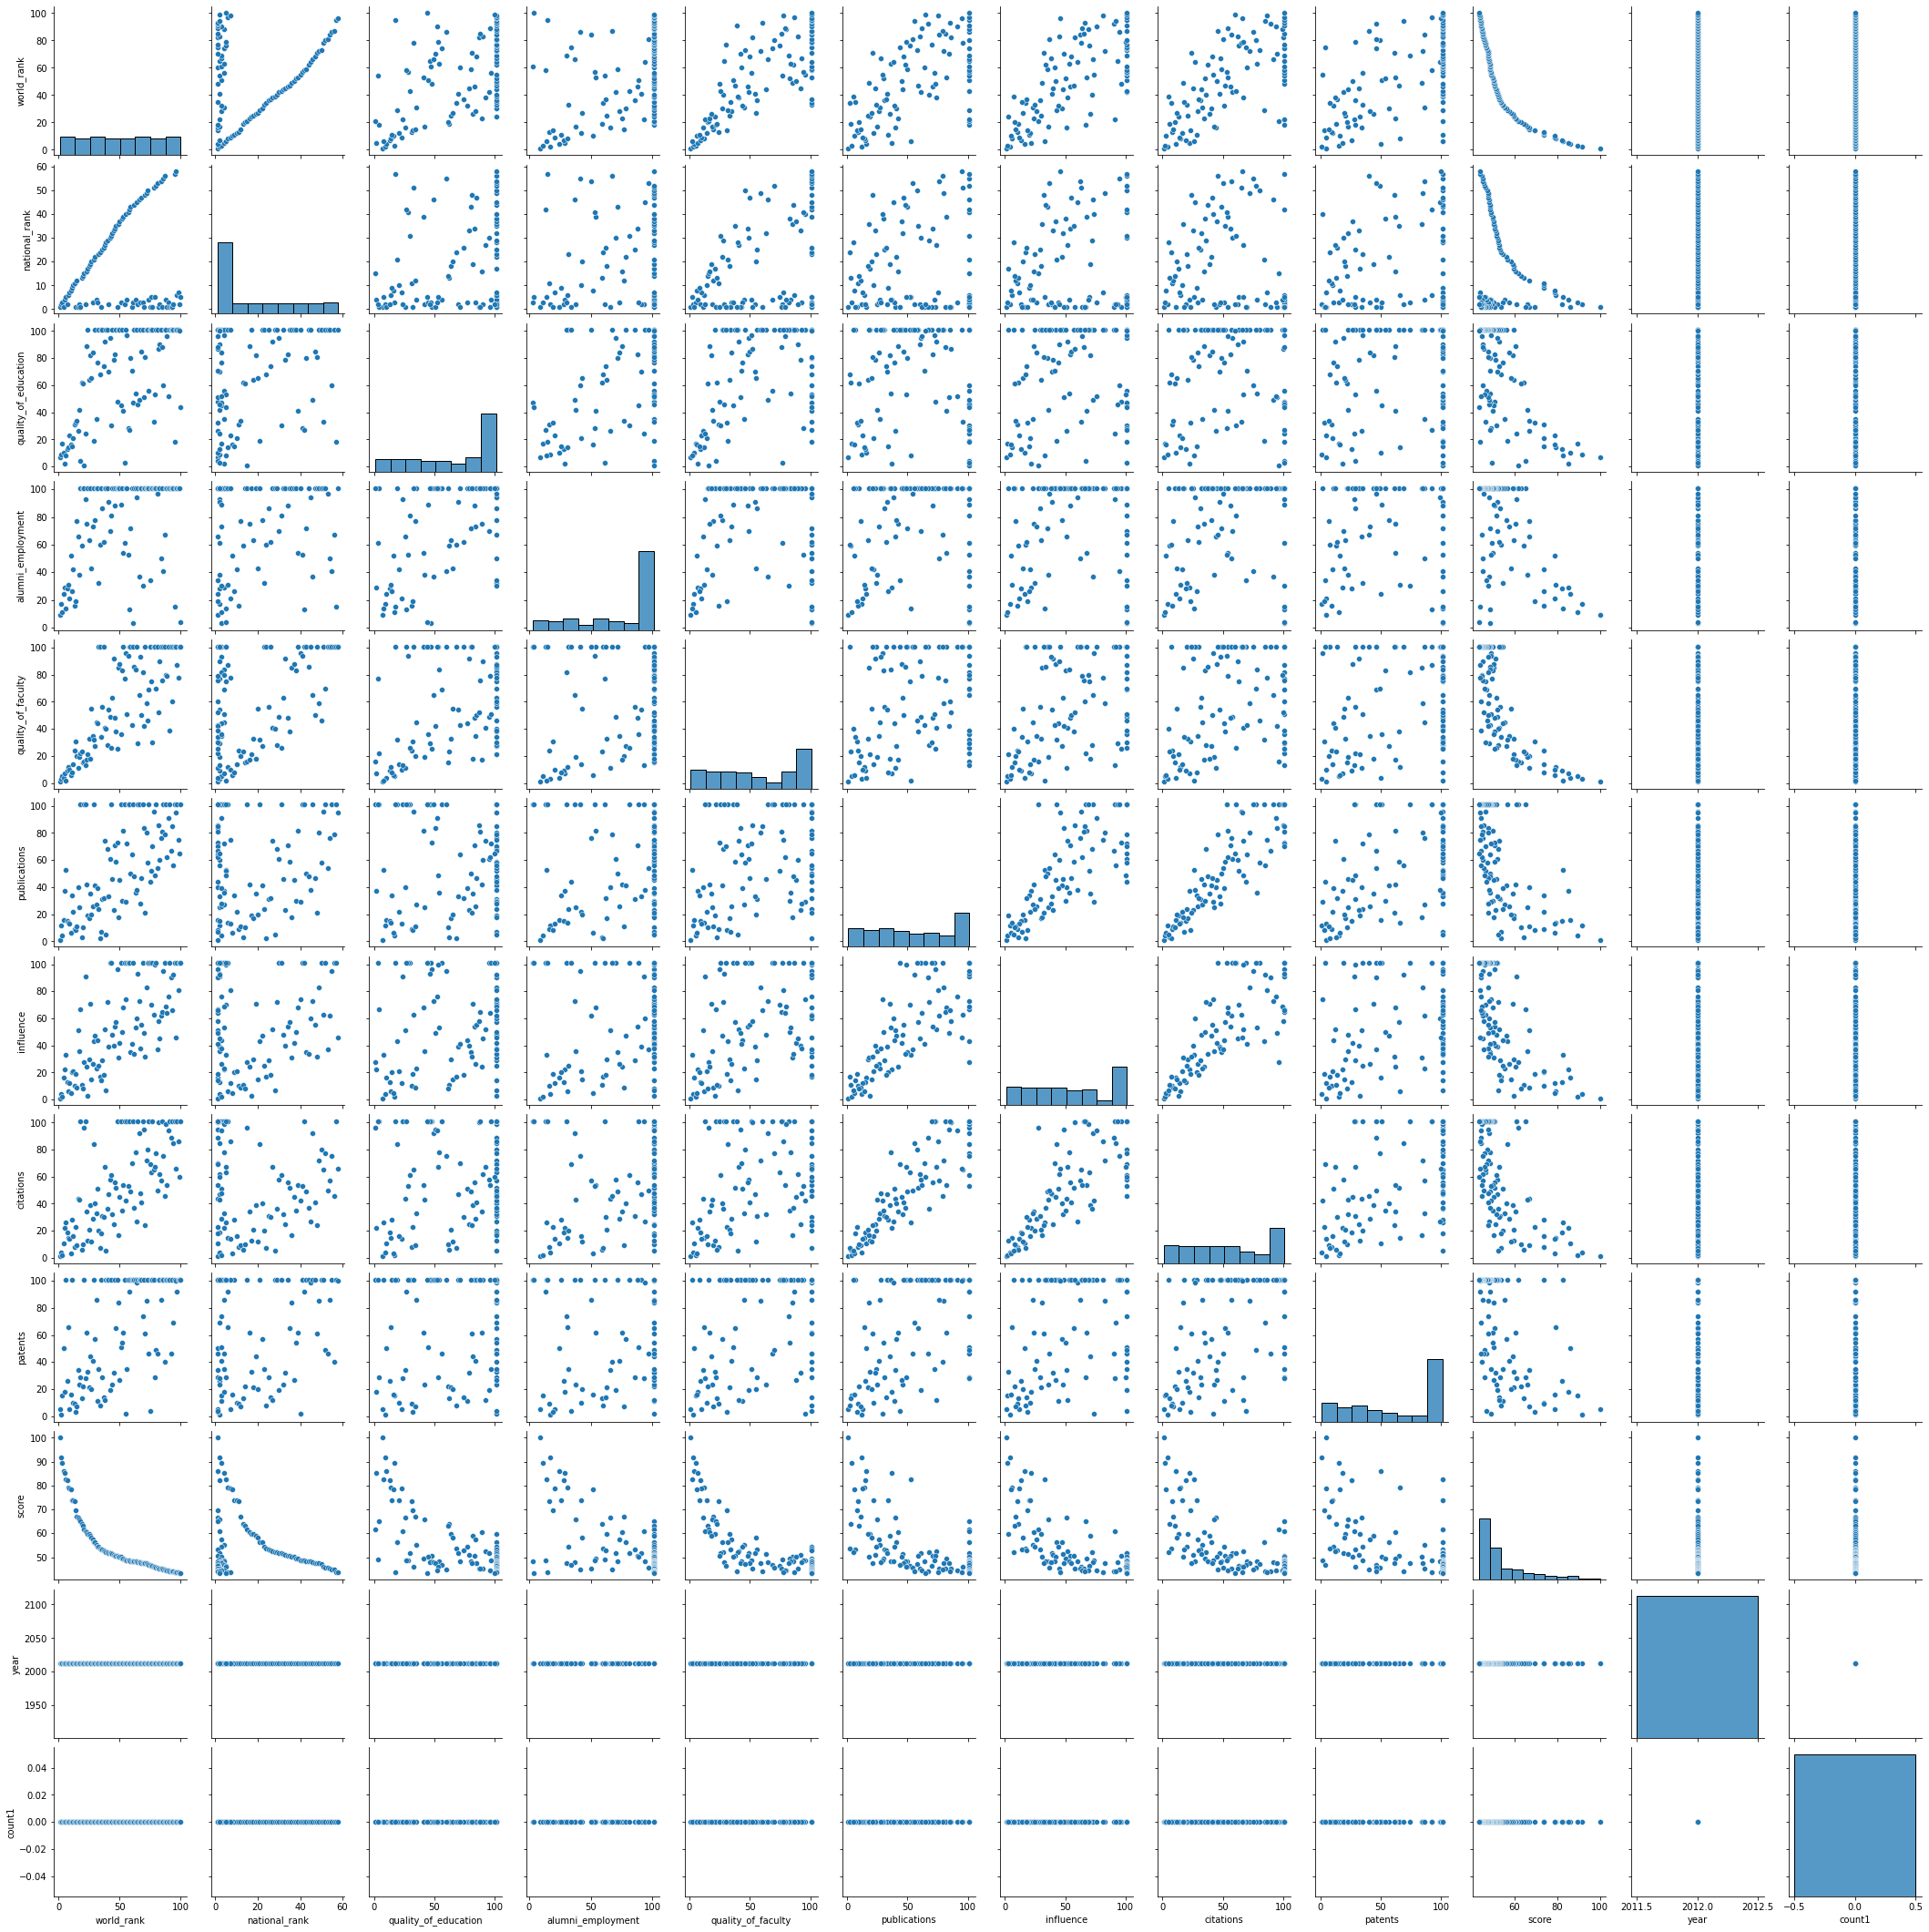

In [74]:
sns.pairplot(unv_df_2012)

Observations

1. University World Rank starts from 1 to 100.
2. Universities in the World ranking are mostly ranked first or second in their countries.
3. Top universities have the highest (quality of education), (alumni employemnt), (quality of faculity), (publication),(influence),(citations and patents).
4. rank=101 Mean>Median. the graph is right skewed.
5. The World Rank and the national rank is directly correlated. As the University is ranked high in the National ranking, It is also ranked higher in the world ranking. Although in some of the cases, some Universities are ranked Top at a national level while at global level they are ranked low.
6. The world rank and the quality of education is evenly distributed for most of the data. The universities with rank 101 in terms of quality of education has world rank between 25 to 100.
7. The world rank and the alumni employment is evenly distributed for most of the data. The universities with rank 101 in terms of alumni employment has world rank between 15 to 100.
8. The world rank and the quality of faculty is evenly distributed for most of the data. The universities with rank 101 in terms of quality of faculty has world rank ranges between 30 to 100.
9. The world rank and the publications is evenly distributed for most of the data. The universities with rank 101 in terms of publications doesn't have world rank in top 20.
10. The word rank and the influence is evenly distributed for most of the data.The universities with rank 101 in terms of influence doesn't have world rank in top 40.
11. The world rank and the citations is evenly distributed for most of the data. The universities with rank 101 in terms of citations doesn't have world rank in top 20.
12. The world rank and the patents is evenly distributed for most of the data. The universities with rank 101 in terms of patents doesn't have the world rank in top 5.
12. The world rank and the score is indirectly proportional to each other. The universities with low score have comparatively higher rank.

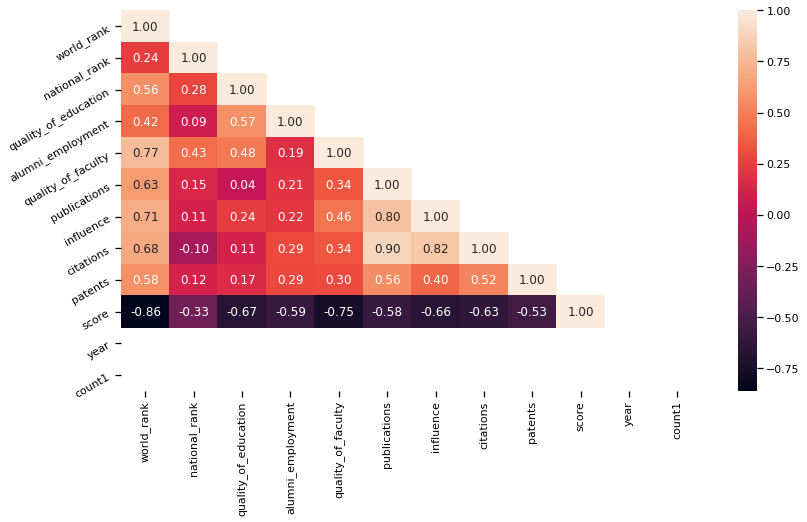

In [75]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr =unv_df_2012.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation

1. World rank and Score are highly corelated to each other.

2. Publications and quality of education is least corelated to each other.

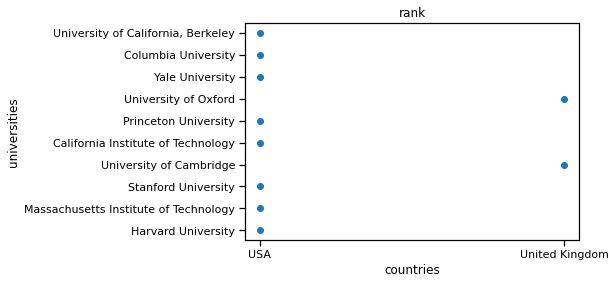

In [76]:
#Top ten universities in terms of world rank 

unv_df_2012_new= unv_df_2012.head(10)
plt.scatter(unv_df_2012_new.country,unv_df_2012_new.institution)
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('rank')
plt.show()

In [77]:
#Top ten universities of the USA as per the national rankings

unv_df_2012_USA=unv_df_2012.loc[unv_df_2012['country']=="USA"]

unv_df_2012_USA.sort_values('national_rank')
print(unv_df_2012_USA["institution"].head(10))

0                        Harvard University
1     Massachusetts Institute of Technology
2                       Stanford University
4        California Institute of Technology
5                      Princeton University
7                           Yale University
8                       Columbia University
9        University of California, Berkeley
10                    University of Chicago
11                       Cornell University
Name: institution, dtype: object


C:\Users\36450057\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='institution', ylabel='alumni_employment'>

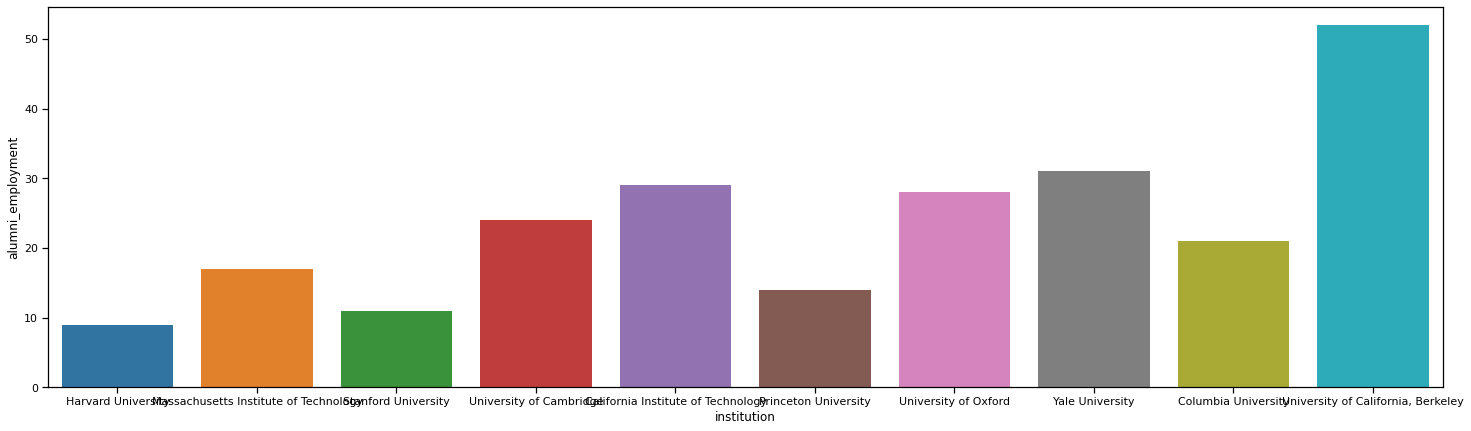

In [79]:
#Alumni employed by the top ten universities  

plt.figure(figsize=(25,7)) # this creates a figure 20 inch wide, 7 inch high
sns.barplot(unv_df_2012_new['institution'], unv_df_2012_new['alumni_employment'])

C:\Users\36450057\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='institution', ylabel='score'>

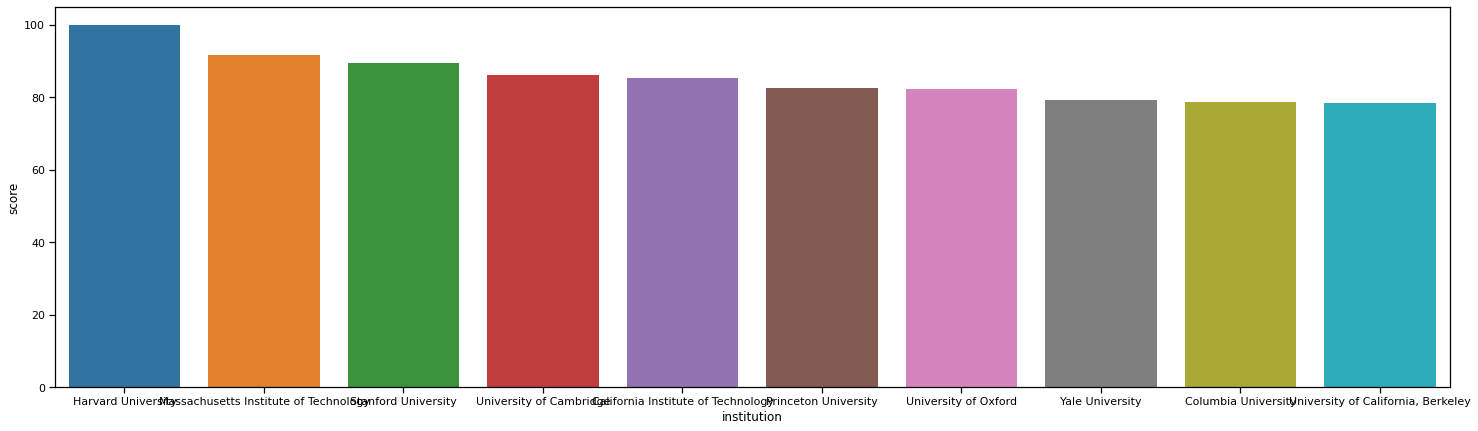

In [80]:
#score vs institution
plt.figure(figsize=(25,7)) # this creates a figure 20 inch wide, 7 inch high
sns.barplot(unv_df_2012_new['institution'], unv_df_2012_new['score'])

# Analysing 2015 data

In [84]:
unv_df_2015=unv_df.loc[unv_df['year'] == 2015]
unv_df_2015.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,count1
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,0
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,0
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,0
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015,0
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015,0
1205,6,Columbia University,USA,4,13,6,9,13,13,11,12.0,4,96.14,2015,0
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7.0,29,92.25,2015,0
1207,8,University of Chicago,USA,6,11,14,8,17,16,12,22.0,141,90.70,2015,0
1208,9,Princeton University,USA,7,4,15,3,72,25,24,33.0,225,89.42,2015,0
1209,10,Cornell University,USA,8,12,18,14,24,15,25,22.0,11,86.79,2015,0


In [85]:
#Shape of the data

unv_df_2015.shape

(1000, 15)

In [86]:
#Missing values in the columns

unv_df_2015.isna().any()

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact            False
patents                 False
score                   False
year                    False
count1                  False
dtype: bool

In [87]:
#List of countries in the dataset

unv_df_2015["country"].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'China', 'Taiwan', 'Russia',
       'Singapore', 'Sweden', 'Denmark', 'Germany', 'Belgium',
       'Netherlands', 'Australia', 'Norway', 'Finland', 'Italy', 'Spain',
       'Brazil', 'South Africa', 'Hong Kong', 'Ireland', 'Austria',
       'Portugal', 'New Zealand', 'Czech Republic', 'Greece', 'Thailand',
       'Mexico', 'India', 'Argentina', 'Chile', 'Poland', 'Hungary',
       'Iceland', 'Turkey', 'Malaysia', 'Slovenia', 'Estonia', 'Croatia',
       'Saudi Arabia', 'Colombia', 'Lebanon', 'Slovak Republic', 'Iran',
       'Serbia', 'Lithuania', 'Egypt', 'Bulgaria', 'Uruguay', 'Uganda',
       'Cyprus', 'United Arab Emirates', 'Puerto Rico', 'Romania'],
      dtype=object)

In [88]:
unv_df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
world_rank,1000.0,500.50000,288.819436,1.00,250.75,500.50,750.2500,1000.0
national_rank,1000.0,42.51200,53.457774,1.00,7.00,22.00,52.0000,229.0
quality_of_education,1000.0,299.83900,109.137446,1.00,250.75,367.00,367.0000,367.0
alumni_employment,1000.0,406.53600,186.782779,1.00,250.75,500.50,567.0000,567.0
quality_of_faculty,1000.0,194.25300,53.709214,1.00,218.00,218.00,218.0000,218.0
publications,1000.0,500.41900,288.760066,1.00,250.75,500.50,750.0000,1000.0
influence,1000.0,500.27500,288.465949,1.00,250.75,500.50,750.2500,991.0
citations,1000.0,451.33400,252.090134,1.00,234.00,428.00,645.0000,812.0
broad_impact,1000.0,496.66400,286.957784,1.00,250.00,495.00,741.0000,1000.0
patents,1000.0,491.67400,275.904565,1.00,250.75,500.50,749.0000,871.0


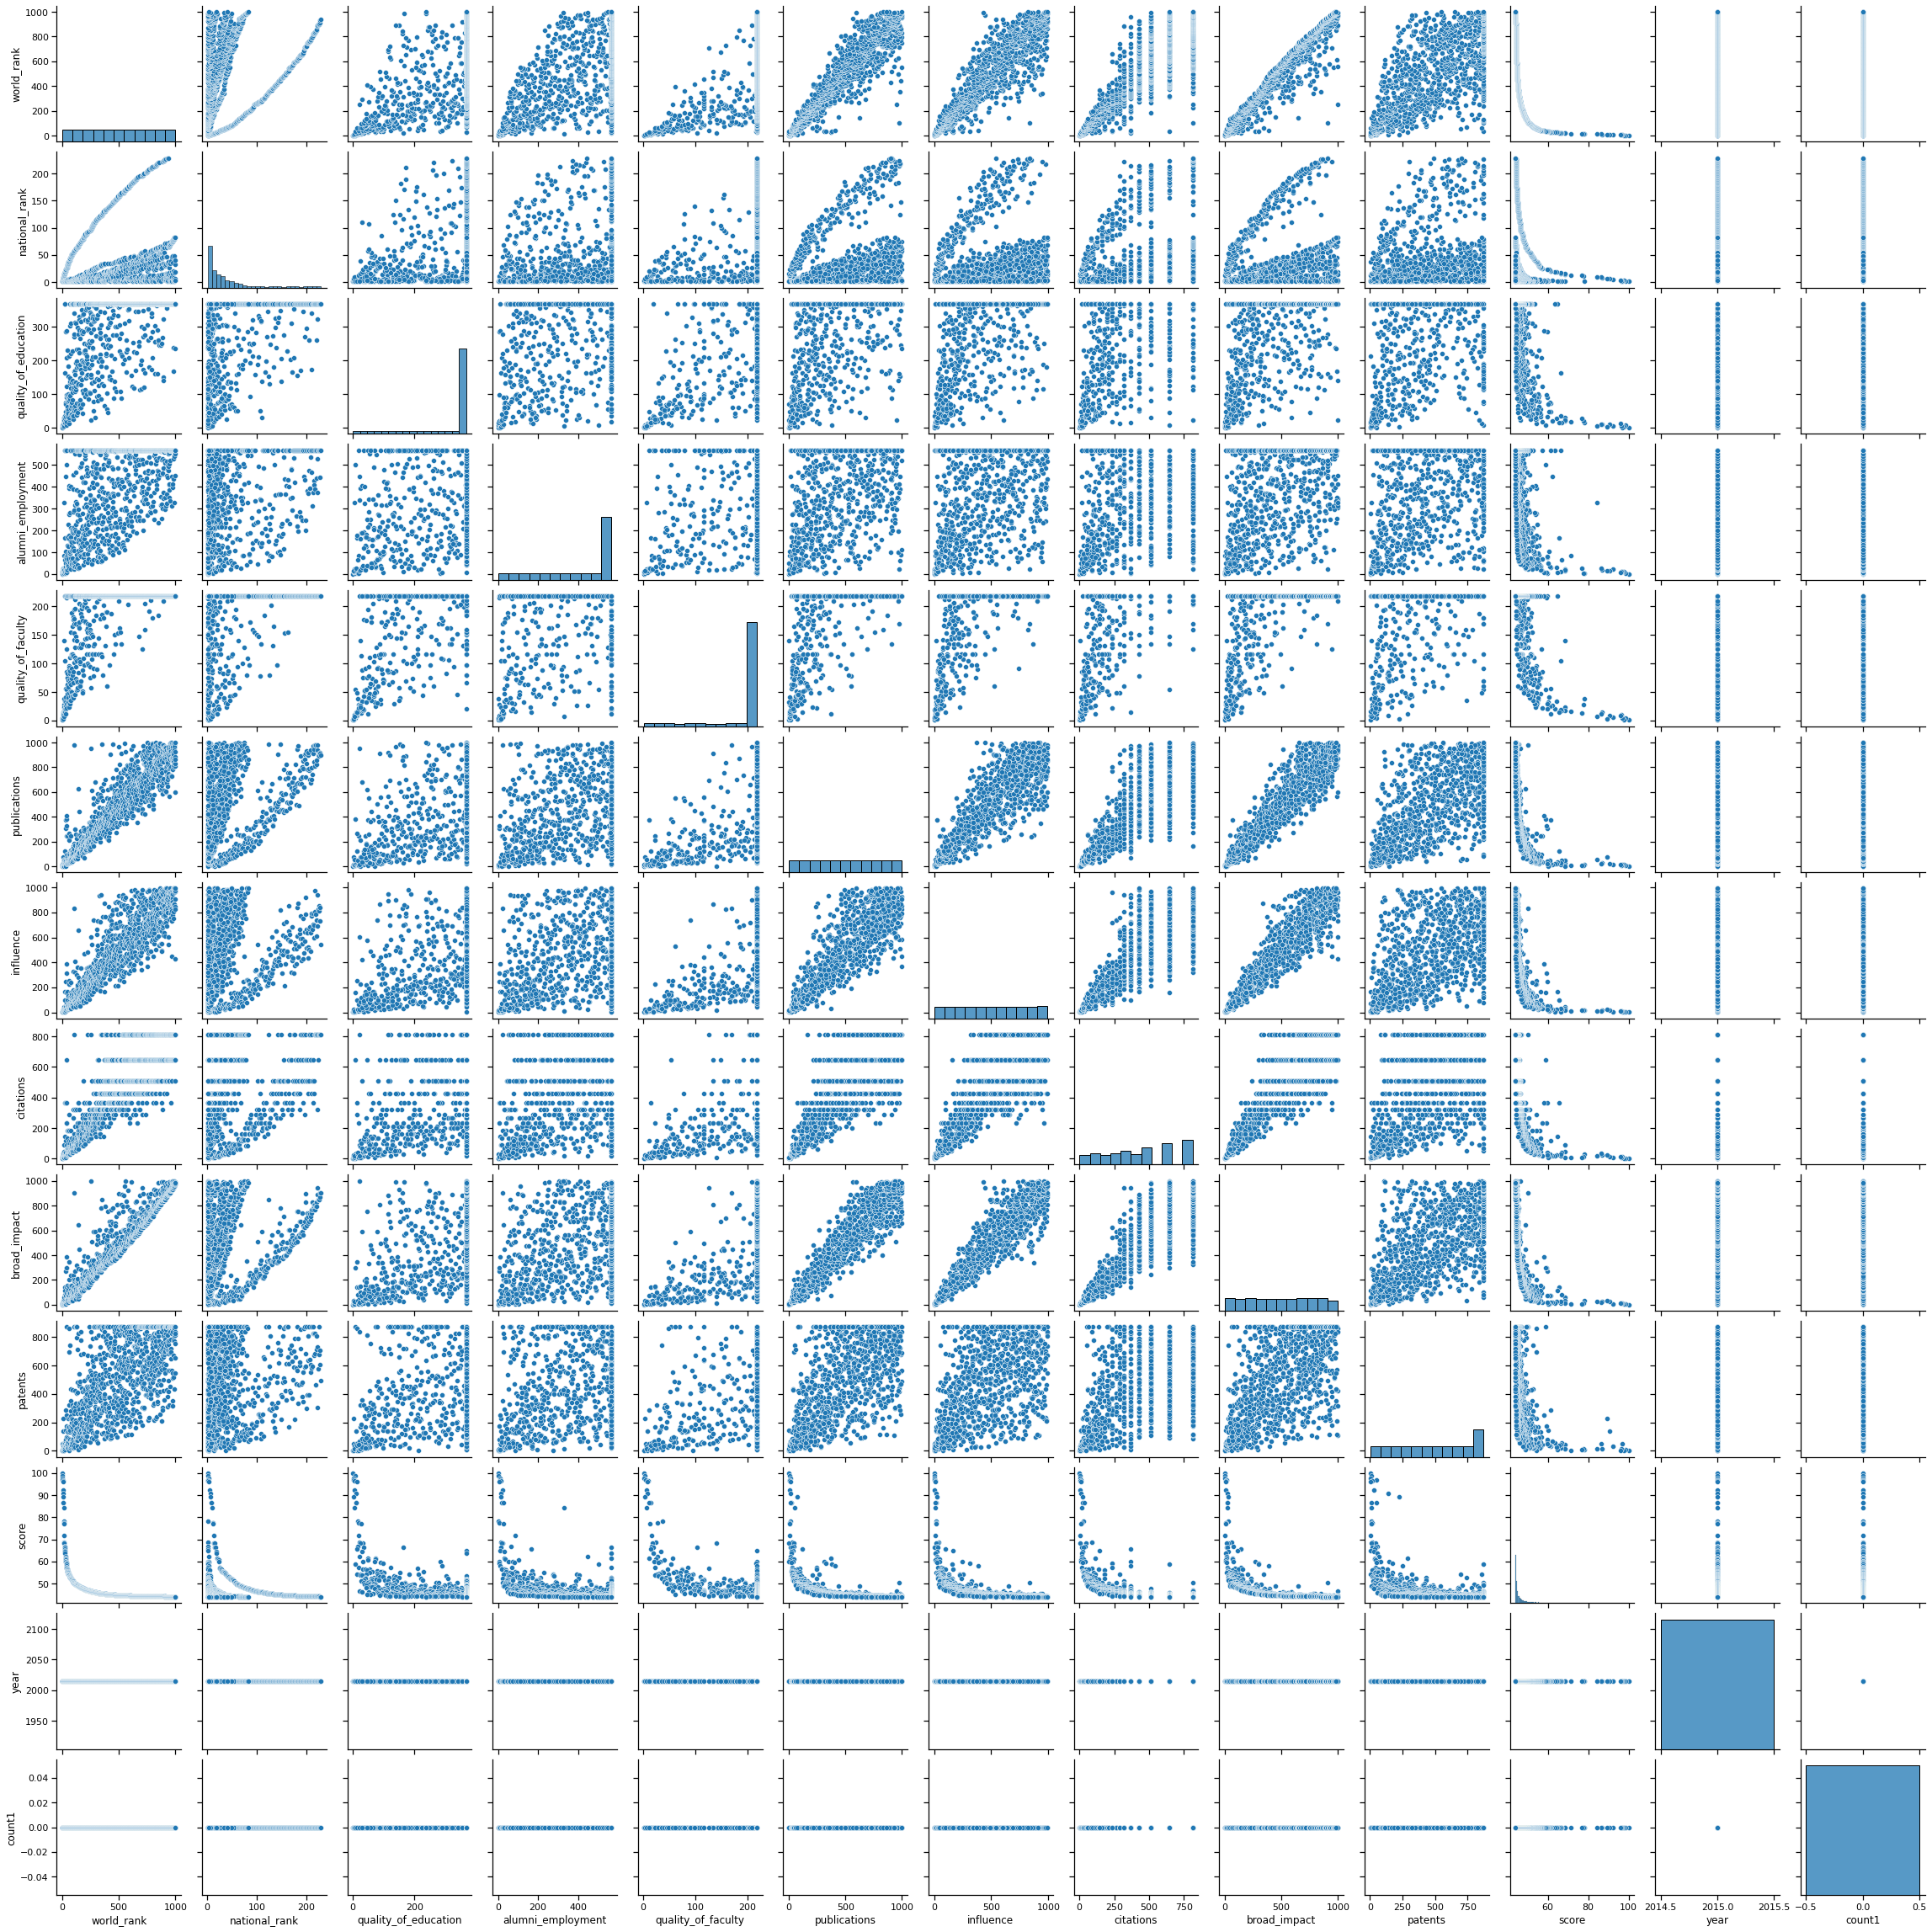

In [89]:
sns.pairplot(unv_df_2015)

# Observations

Same observations as 2012

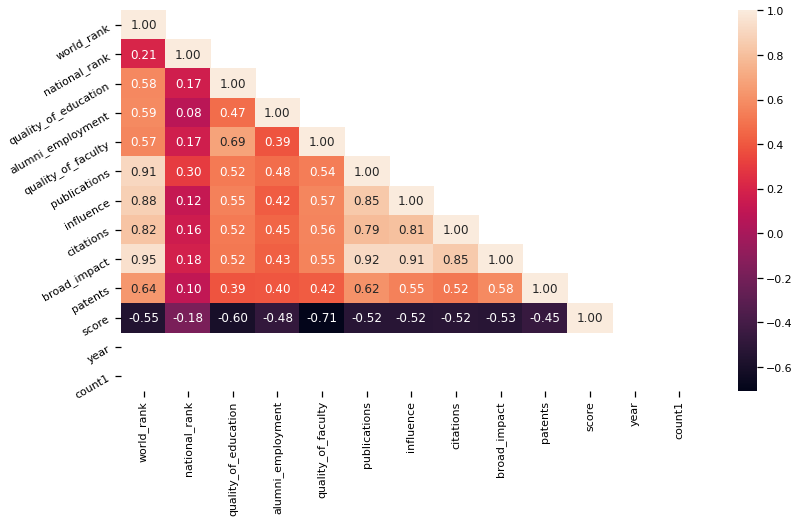

In [90]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr =unv_df_2015.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

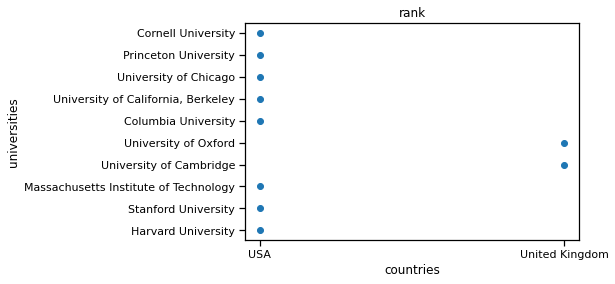

In [94]:
#Top ten universities in terms of world rank 

unv_df_2015_new= unv_df_2015.head(10)
plt.scatter(unv_df_2015_new.country,unv_df_2015_new.institution)
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('rank')
plt.show()

In [101]:
#Top 5 universities of the South Africa as per the national rankings

unv_df_2015_SA=unv_df_2015.loc[unv_df_2015['country']=="South Africa"]

unv_df_2015_USA.sort_values('national_rank')
print(unv_df_2015_SA["institution"].head(10))

1348    University of the Witwatersrand
1447            University of Cape Town
1505            Stellenbosch University
1677        University of KwaZulu-Natal
1877             University of Pretoria
Name: institution, dtype: object


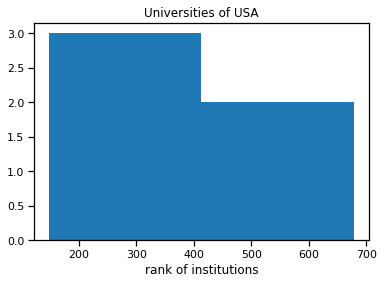

In [100]:
# University of South Africa world ranking 
plt.hist(unv_df_2015_SA.world_rank,bins=2) #histogram
plt.title('Universities of USA')
plt.xlabel("rank of institutions")
plt.show()

C:\Users\36450057\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='institution', ylabel='alumni_employment'>

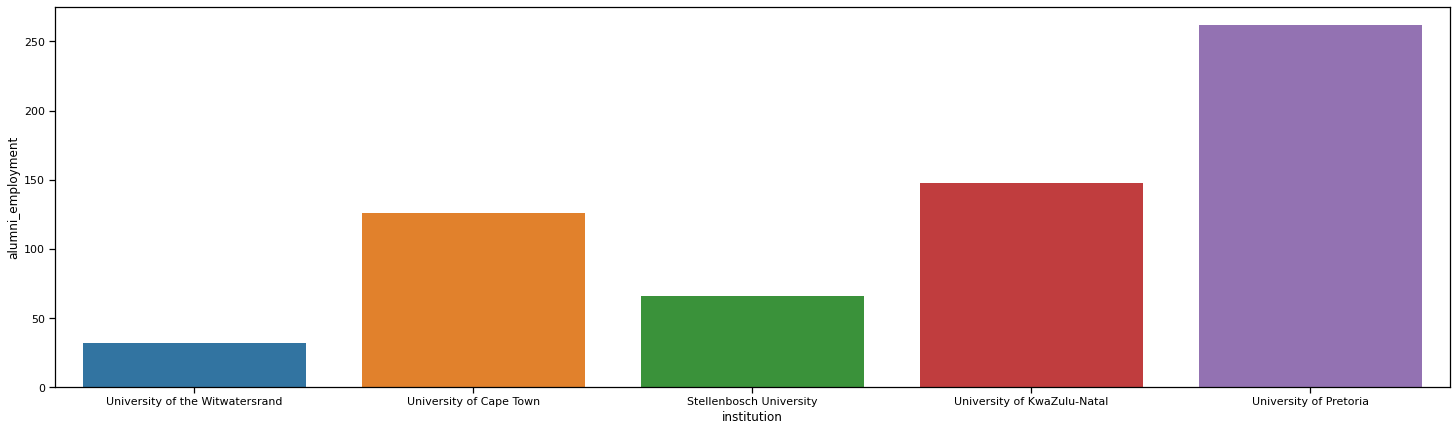

In [102]:
#Alumni employed from the to SA universities  

plt.figure(figsize=(25,7)) # this creates a figure 20 inch wide, 7 inch high
sns.barplot(unv_df_2015_SA['institution'], unv_df_2015_SA['alumni_employment'])

University of Pretoria has the highest alumin employment although its number 5 on the National Ranking

C:\Users\36450057\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='institution', ylabel='score'>

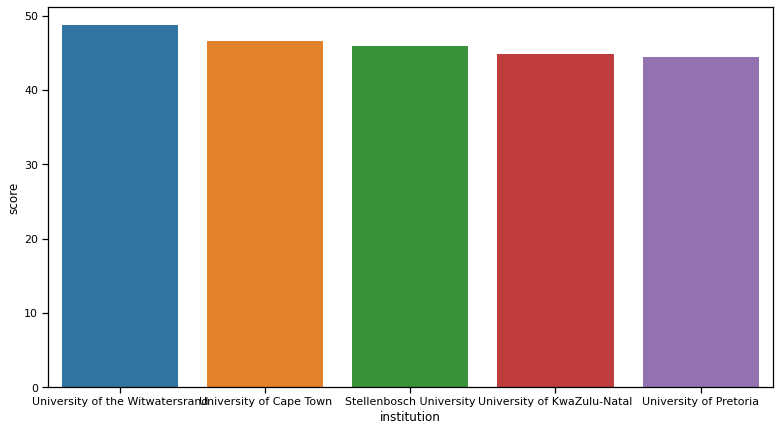

In [105]:
#Score vs Institute 
plt.figure(figsize=(13,7)) # this creates a figure 20 inch wide, 7 inch high
sns.barplot(unv_df_2015_SA['institution'], unv_df_2015_SA['score'])



# Observation

Ranking is direclty related to score percentage 